# [A Data Science Framework: To Achieve 99% Accuracy](<https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy>)

# Step 1: Define Problems

Predict the survive rate of a passenger on Titanic


# Step 2: Gather Data


Data downloaded from Kaggle located in ./data folder


# Step 3: Prepare Data for Consumption


## 3.1: Import libraries


In [1]:
import sys
print(f'python version: {sys.version}')

import pandas as pd
from tabulate import tabulate # for better df printing
print(f'pandas version: {pd.__version__}')

import matplotlib
print(f'matplotlib version: {matplotlib.__version__}')

import numpy as np
print(f'numpy version: {np.__version__}')

import scipy as sp
print(f'scipy version: {sp.__version__}')

import IPython
from IPython import display
print(f'IPython version: {IPython.__version__}')

import sklearn
print(f'sklearn version: {sklearn.__version__}')

import random
import time

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('_'*25)

from subprocess import check_output
print(check_output(["ls", "./data"]).decode('utf-8'))



python version: 3.8.10 (default, Nov 26 2021, 20:14:08) 
[GCC 9.3.0]
pandas version: 1.3.5
matplotlib version: 3.5.1
numpy version: 1.21.5
scipy version: 1.7.3
IPython version: 7.30.1
sklearn version: 1.0.2
_________________________
test.csv
train.csv



## 3.11 Load Data Modelling Libraries


In [2]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from typing import List, Optional
import plotly.figure_factory as ff

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3.2 Meet and Greet Data


In [3]:
data_raw = pd.read_csv('./data/train.csv')
data_val = pd.read_csv('./data/test.csv')

# create copy of data before play
data_test = data_raw.copy(deep=True)
train_test_pair = [data_test, data_val] # clearn test data set in the same time

# preview data
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S


### The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting


In [4]:
# check null
print('null in train data: ')
data_test.isnull().sum()

null in train data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print('null in test/validaton data')
data_val.isnull().sum()

null in test/validaton data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
data_test.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
data_test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3.22 Clean Data

### Handle missing data

In [8]:
# complete missing data
# median for age
for dataset in train_test_pair:
    dataset['Age'].fillna(data_raw['Age'].median(), inplace=True)

    # mode for embarked, mode is object, different from media
    dataset['Embarked'].fillna(data_raw['Embarked'].mode()[0], inplace=True)

    # median for fare
    dataset['Fare'].fillna(data_raw['Fare'].median(), inplace=True)

In [9]:
# delete unrelative/unsiginificant data
# delete columuns
drop_columns = ['PassengerId', 'Ticket', 'Cabin']
data_test.drop(drop_columns, axis=1,inplace=True)

# delte rows

In [10]:
data_test.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Feature Engineering

In [12]:
# Create new features:
for dataset in train_test_pair:
    # family size: SibSp + Parch + self
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # isAlone
    dataset['IsAlone'] = dataset['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

    # Title


    # FareBin: separate into 4 groups
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['FareBin'] = dataset['FareBin'].astype(str)

    # AgeBin: split into 5 groups
    dataset['AgeBin'] = pd.cut(dataset['Age'], 5)
    dataset['AgeBin'] = dataset['AgeBin'].astype(str)

print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  IsAlone     891 non-null    int64  
 11  FareBin     891 non-null    object 
 12  AgeBin      891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None


In [13]:
print(data_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
 12  IsAlone      418 non-null    int64  
 13  FareBin      418 non-null    object 
 14  AgeBin       418 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 49.1+ KB
None


In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  IsAlone     891 non-null    int64  
 11  FareBin     891 non-null    object 
 12  AgeBin      891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


## 3.23 Convert Formats

In [15]:

# Code categorical data
label = LabelEncoder()
for dataset in train_test_pair:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])

# Define target feature
Target = ['Survived']

# Define feature selection
data_test_x = ['Sex','Pclass', 'Embarked','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data_test_x_calc = ['Sex_Code','Pclass', 'Embarked_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data_test_xy = Target + data_test_x
print(f'Original X Y: {data_test_xy}')

Original X Y: ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [16]:
# define w/bin features
data_test_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_test_xy_bin = Target + data_test_x_bin
print(f'Bin X Y: {data_test_xy_bin}')

Bin X Y: ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']


In [17]:
# define dummy features
data_test_dummy = pd.get_dummies(data_test[data_test_x])
data_test_dummy

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,1,1,0,1,0,0,1
887,1,0,0,19.0,30.0000,1,1,1,0,0,0,1
888,3,1,2,28.0,23.4500,4,0,1,0,0,0,1
889,1,0,0,26.0,30.0000,1,1,0,1,1,0,0


In [18]:
data_test_x_dummy = data_test_dummy.columns.tolist()
data_test_x_dummy

['Pclass',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [19]:
data_test_xy_dummy = Target + data_test_x_dummy
data_test_xy_dummy


['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

## 3.24 Double check cleaned data

In [20]:
print('Train columns with null values: \n', data_test.isnull().sum())
print("-"*10)
print (data_test.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
FareBin_Code     0
AgeBin_Code      0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Name           891 non-null    object 
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Embarked       891 non-null    object 
 9   FamilySize     891 non-nu

## 3.25 Split Training and Testing data

In [21]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data_test[data_test_x_calc], data_test[Target], random_state=0)

train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data_test[data_test_x_bin], data_test[Target], random_state=0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data_test_dummy[data_test_x_dummy], data_test[Target], random_state=0)

print("Data1 Shape: {}".format(data_test.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

Data1 Shape: (891, 17)
Train1 Shape: (668, 7)
Test1 Shape: (223, 7)


# Step 4: EDA

In [22]:
data_test[data_test_x].dtypes

Sex            object
Pclass          int64
Embarked       object
SibSp           int64
Parch           int64
Age           float64
Fare          float64
FamilySize      int64
IsAlone         int64
dtype: object

In [23]:
# data_test['Sex', 'Survived'].groupby(['Sex','Survived'], as_index=False)['Name'].count()


In [24]:
data_test[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [25]:
data_test[['Embarked', 'Survived']][data_test['Survived'] == 1].value_counts()


Embarked  Survived
S         1           219
C         1            93
Q         1            30
dtype: int64

In [26]:
# print info for categorical column
for col in data_test_x:
    if data_test[col].dtype != 'float64':
        print(f'Survival Correlation by : {col}')
        print(data_test[[col, Target[0]]].groupby(col, as_index=False).mean())


Survival Correlation by : Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Survival Correlation by : Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survival Correlation by : Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Survival Correlation by : SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Survival Correlation by : Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
Survival Correlation by : FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
Survival Correlation by : IsAlone

In [27]:
from mc_plot import mc_boxplots_solo
box_plot_cols = ['Fare', 'Age', 'FamilySize']
units = ['$', 'Years', 'Count']
mc_boxplots_solo(data_test, box_plot_cols, units)

In [28]:
from mc_plot import mc_histgram
hist_cols = ['Fare', 'Age','FamilySize']
target = 'Survived' 
mc_histgram(data_test, hist_cols, target)

In [29]:

bar_cols = ['Embarked','Pclass','IsAlone']
from mc_plot import mc_df_bar
mc_df_bar(data_test, bar_cols, 'Survived')

In [30]:
point_cols = ['FareBin', 'AgeBin', 'FamilySize']
# point_cols = ['FamilySize']

mc_df_bar(data_test, point_cols, 'Survived')

In [31]:
from mc_plot import mc_boxplots_xy
cols = ['Fare', 'Age', 'FamilySize']
mc_boxplots_xy(data_test, cols, 'Survived', 'Pclass')

In [32]:
# TODO bar xy
data_test[['Sex', 'Embarked','Survived']].groupby(['Sex','Embarked'],as_index=False).mean()

,Sex,Embarked,Survived
0,female,C,0.876712
1,female,Q,0.750000
2,female,S,0.692683
3,male,C,0.305263
4,male,Q,0.073171
5,male,S,0.174603


In [33]:
# px.scatter_matrix(data_test,dimensions=['Survived','Pclass','Sex','Age','FamilySize', 'IsAlone','FareBin','AgeBin'])
px.scatter_matrix(data_test,dimensions=['Survived','Pclass','Sex','Age'])

In [34]:
corr = data_test.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_Code,Embarked_Code,FareBin_Code,AgeBin_Code
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639,-0.203367,-0.543351,-0.167675,0.101883,-0.043800
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997,0.135207,0.131900,0.162098,-0.221906,-0.358769
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619,0.171647,0.081163,-0.018754,0.039764,0.939139
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.114631,0.068230,0.067507,-0.218747
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.245489,0.039798,0.056530,-0.135227
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138,-0.271832,-0.182333,-0.224719,0.169060,0.123640
FamilySize,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.200988,0.066516,0.074380,-0.217063
IsAlone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,0.303646,0.063532,-0.084823,0.123981
Sex_Code,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,1.000000,0.108262,-0.093323,0.070220
Embarked_Code,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,0.066516,0.063532,0.108262,1.000000,0.116838,-0.003402


In [35]:
from mc_plot import mc_df_heatmap
mc_df_heatmap(data_test)

# Step 5: Model Data

In [36]:
# MLA Selection and Initialization
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    

]

In [37]:
# split frame
cv_split = model_selection.ShuffleSplit(
    n_splits=10, test_size=0.3, train_size=0.6, random_state=0)

# create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# table to compare MLA predictions
MLA_predict = data_test[Target]

# index through MLA and save performance to table
row_index = 0
for alg in MLA:
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    # score model with cross validation
    cv_results = model_selection.cross_validate(
        alg, data_test[data_test_x_bin], data_test[Target], cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = \
        cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = \
        cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = \
        cv_results['test_score'].mean()
    # if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = \
        cv_results['test_score'].std(
    )*3  # let's know the worst that can happen!

    # save prediction
    alg.fit(data_test[data_test_x_bin], data_test[Target])
    MLA_predict[MLA_name] = alg.predict(data_test[data_test_x_bin])


    row_index += 1


[02:18:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [38]:
MLA_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,0,1,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
889,1,1,0,0,0,0,0,1,1,1,...,1,0,0,0,1,0,0,1,1,0


In [39]:
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,MLA name
3,NaN,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.859551,0.816791,0.062617,0.058898,GradientBoostingClassifier
4,NaN,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.884082,0.813806,0.07123,0.106691,RandomForestClassifier
14,NaN,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.827715,0.812687,0.034611,0.03352,SVC
21,NaN,"{'objective': 'binary:logistic', 'use_label_en...",0.879775,0.811567,0.053976,0.063151,XGBClassifier
2,NaN,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.884082,0.811567,0.070309,0.109589,ExtraTreesClassifier
15,NaN,"{'break_ties': False, 'cache_size': 200, 'clas...",0.823408,0.810821,0.045622,0.038711,NuSVC
17,NaN,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.884082,0.808582,0.064119,0.002385,DecisionTreeClassifier
1,NaN,"{'base_estimator': None, 'bootstrap': True, 'b...",0.879588,0.805224,0.068054,0.016736,BaggingClassifier
5,NaN,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.858052,0.804478,0.059064,0.248691,GaussianProcessClassifier
18,NaN,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.884082,0.803731,0.076448,0.002274,ExtraTreeClassifier


In [40]:
# bar plot for accuracy
px.bar(MLA_compare, y = 'MLA name',x = 'MLA Test Accuracy Mean', orientation='h')

## 5.1 Evaluate Model Performance

### How to set up a baseline

First based on probability: 0 or 1 that's 0.5 accuracy
Then account the results frequent occurrence, which is 67.5% people died, we can get 0.675 accuracy

### Create your own model

In [41]:
# TODO coin flip model expected result 0.5

In [42]:
# group by pivot table female
pivot_female = data_test[data_test['Sex'] == 'female'].groupby(
    ['Sex', 'Pclass', 'Embarked'], as_index=False)['Survived'].mean()
pivot_female


,Sex,Pclass,Embarked,Survived
0,female,1,C,0.976744
1,female,1,Q,1.000000
2,female,1,S,0.960000
3,female,2,C,1.000000
4,female,2,Q,1.000000
5,female,2,S,0.910448
6,female,3,C,0.652174
7,female,3,Q,0.727273
8,female,3,S,0.375000


In [43]:
# group by pivot table male
pivot_male = data_test[data_test['Sex'] == 'male'].groupby(
    ['Sex'], as_index=False)['Survived'].mean()
pivot_male

,Sex,Survived
0,male,0.188908


### Build handle made decision tree model

In [44]:
def mytree(df):
    # res = pd.DataFrame(data = {'Predict':[]})
    prediction = []
    for i in df.index:
        row = df.iloc[i]
        if row['Sex'] == 'male':
            prediction.append(0)
        else:
            if row['Pclass'] == 3:
                prediction.append(0) if row['Embarked'] == 'S' \
                    else prediction.append(1)
            else:
                prediction.append(1)

    res = pd.DataFrame(data={'Predict': prediction})

    return res

In [45]:
Tree_Prediction = mytree(data_test)
print(f'Handle made tree model accuracy/precision score: {metrics.accuracy_score(data_test[Target], Tree_Prediction) * 100}. ')

Handle made tree model accuracy/precision score: 81.14478114478115. 


Visualize confusion matrix

In [46]:
metrics.confusion_matrix(data_test[Target], Tree_Prediction)

array([[523,  26],
       [142, 200]])

In [47]:
confusion_matrix = metrics.confusion_matrix(data_test[Target], Tree_Prediction)
class_names = ['Survived', 'Unsurvived']
layout = {
    "title": "Confusion Matrix",
    "xaxis": {"title": "Predicted value"},
    "yaxis": {"title": "Real value"}
}

fig = ff.create_annotated_heatmap(z=confusion_matrix,
                                  x=class_names,
                                  y=class_names,
                                  colorscale=px.colors.sequential.Blues)
fig.show()

In [48]:
confusion_matrix = metrics.confusion_matrix(data_test[Target], Tree_Prediction)
confusion_matrix = confusion_matrix/confusion_matrix.astype(int).sum()
confusion_matrix = np.round(confusion_matrix, 3)
class_names = ['Survived', 'Unsurvived']
layout = {
    "title": "Confusion Matrix",
    "xaxis": {"title": "Predicted value"},
    "yaxis": {"title": "Real value"}
}

fig = ff.create_annotated_heatmap(z=confusion_matrix,
                                  x=class_names,
                                  y=class_names,
                                  colorscale=px.colors.sequential.Blues)
fig.show()


## 5.11 Model Performance with Cross-Validation

## 5.12 Tune Model with Hyper-Parameters

In [49]:
# base model
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(
    dtree, data_test[data_test_x_bin], data_test[Target], cv=cv_split, return_train_score=True)
dtree.fit(data_test[data_test_x_bin], data_test[Target])

print(f'Before DT parameters {dtree.get_params()}')
print("BEFORE DT Training w/bin score mean: {:.2f}". format(
    base_results['train_score'].mean()*100))
print(
    "BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(
    base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


Before DT parameters {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 88.41
BEFORE DT Test w/bin score mean: 80.78
BEFORE DT Test w/bin score 3*std: +/- 6.45
----------


In [50]:
# Tune hyper-parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'random_state': [0],
}

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(
), param_grid=param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
tune_model.fit(data_test[data_test_x_bin], data_test[Target])

print(f'After DT parameters {tune_model.best_params_}')
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

After DT parameters {'criterion': 'gini', 'max_depth': 4, 'random_state': 0, 'splitter': 'best'}
AFTER DT Training w/bin score mean: 88.92
AFTER DT Test w/bin score mean: 86.61
AFTER DT Test w/bin score 3*std: +/- 6.32
----------


## 5.13 Tune Model with Feature Selection

In [51]:
base_results['train_score'].mean()

0.8840823970037454

In [52]:
# base model
print('Before DR RFE Traing')
print(f'Shape: {data_test[data_test_x_bin].shape}')
print(f'Columns: {data_test[data_test_x_bin].columns.values}')

print(f'W bin train score mean: {base_results["train_score"].mean()*100}')
print(f'W bin test score mean: {base_results["test_score"].mean()*100}')
print(f'W bin test score 3*std mean: {base_results["test_score"].std()*300}')

Before DR RFE Traing
Shape: (891, 6)
Columns: ['Sex_Code' 'Pclass' 'Embarked_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
W bin train score mean: 88.40823970037454
W bin test score mean: 80.78358208955223
W bin test score 3*std mean: 6.454792497017233


In [53]:
# feature selection
dtree_rfe = feature_selection.RFECV(dtree, step=1, scoring='accuracy', cv=cv_split)
dtree_rfe.fit(data_test[data_test_x_bin], data_test[Target])

X_rfe = data_test[data_test_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data_test[X_rfe], data_test[Target], cv=cv_split, return_train_score=True)

print('After RFE')
print(f'Shape: {data_test[X_rfe].shape}')
print(f'Columns: {X_rfe}')

print(f'train score: {rfe_results["train_score"].mean()*100}')
print(f'test score: {rfe_results["test_score"].mean()*100}')
print(f'test score 3*std: {rfe_results["test_score"].std()*300}')

After RFE
Shape: (891, 5)
Columns: ['Sex_Code' 'Pclass' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
train score: 86.76029962546818
test score: 81.4179104477612
test score 3*std: 7.111513510866532


In [54]:
# rfe turn
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=cv_split, return_train_score=True)
rfe_tune_model.fit(data_test[X_rfe], data_test[Target])

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0, 'splitter': 'best'}
AFTER DT RFE Tuned Training w/bin score mean: 88.96
AFTER DT RFE Tuned Test w/bin score mean: 86.23
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.48


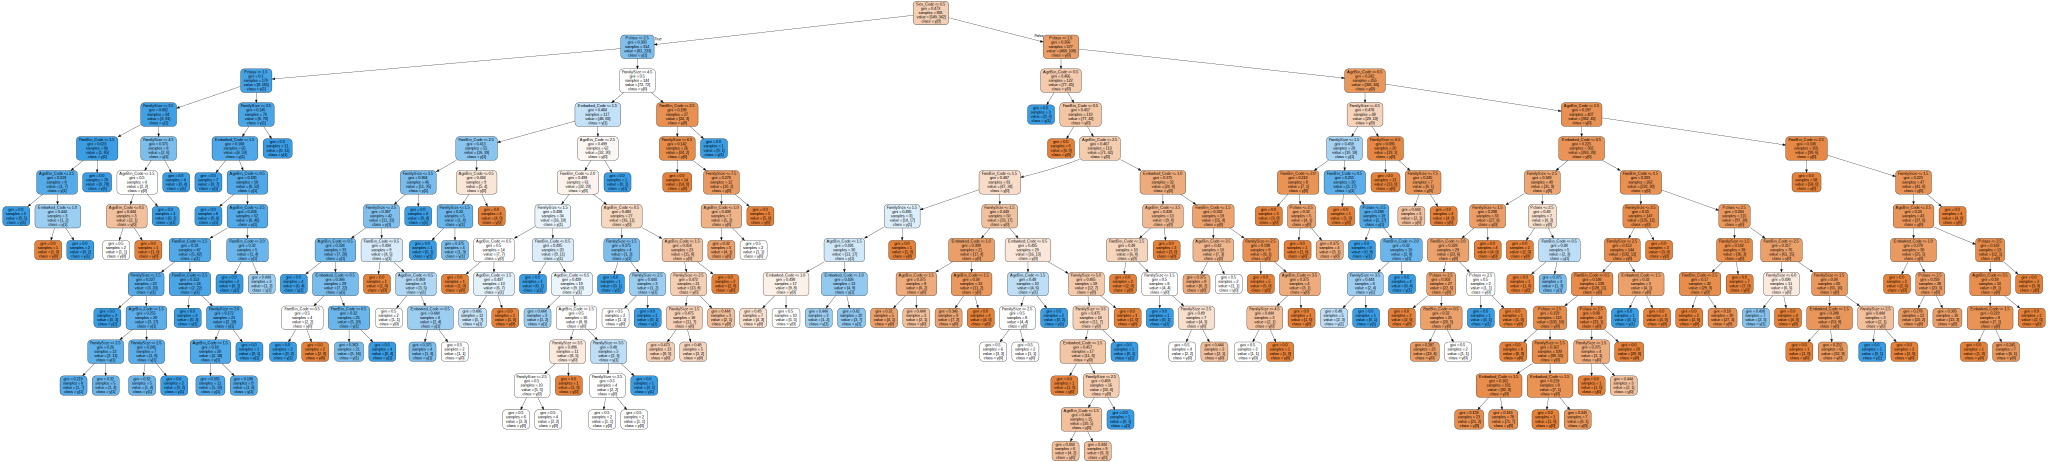

In [55]:
# Graph MLA version of tree
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=data_test_x_bin, class_names=True, filled=True, rounded=True)
graphviz.Source(dot_data)


# Step 6: Validate and Implement

In [56]:
mc_df_heatmap(MLA_predict)

In [57]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

In [59]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data_test[data_test_x_bin], data_test[Target], cv  = cv_split, return_train_score=True)
vote_hard.fit(data_test[data_test_x_bin], data_test[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

[02:30:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:30:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:30:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:30:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [60]:
#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data_test[data_test_x_bin], data_test[Target], cv  = cv_split, return_train_score=True)
vote_soft.fit(data_test[data_test_x_bin], data_test[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

[02:31:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:31:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:31:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:31:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [62]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

In [63]:
grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]

In [65]:
start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc',return_train_score=True)
    best_search.fit(data_test[data_test_x_bin], data_test[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.39 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 36.36 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with a runtime of 61.52 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 31.88 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300, 'oob_score': True, 'random_state': 0} with a runtime of 89.24 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 26.98 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state

In [67]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data_test[data_test_x_bin], data_test[Target], cv  = cv_split, return_train_score=True)
grid_hard.fit(data_test[data_test_x_bin], data_test[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data_test[data_test_x_bin], data_test[Target], cv  = cv_split, return_train_score=True)
grid_soft.fit(data_test[data_test_x_bin], data_test[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

[02:45:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:45:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:45:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:45:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [68]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Age            418 non-null    float64
 5   SibSp          418 non-null    int64  
 6   Parch          418 non-null    int64  
 7   Ticket         418 non-null    object 
 8   Fare           418 non-null    float64
 9   Cabin          91 non-null     object 
 10  Embarked       418 non-null    object 
 11  FamilySize     418 non-null    int64  
 12  IsAlone        418 non-null    int64  
 13  FareBin        418 non-null    object 
 14  AgeBin         418 non-null    object 
 15  Sex_Code       418 non-null    int64  
 16  Embarked_Code  418 non-null    int64  
 17  FareBin_Code   418 non-null    int64  
 18  AgeBin_Cod

In [69]:
#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("./data/submit.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)

Validation Data Distribution: 
 0    0.73445
1    0.26555
Name: Survived, dtype: float64


,PassengerId,Survived
181,1073,0
266,1158,0
256,1148,0
225,1117,1
35,927,0
118,1010,0
250,1142,1
320,1212,0
27,919,0
370,1262,0


# Step 7: Optimize and Strategize

## Conclusion